# K-Means Clustering

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
census_data = pd.read_excel('https://cdn.upgrad.com/UpGrad/temp/5113c766-2c78-4bed-ae52-181ea674743b/Main.xlsx')
census_data.head()

,Area Name,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,State - JAMMU & KASHMIR,3378518,385463,12541302,26.939133,3.073549
1,State - HIMACHAL PRADESH,963742,267936,6864602,14.039299,3.903154
2,State - PUNJAB,4886265,979525,27743338,17.612390,3.530667
3,State - CHANDIGARH,175200,91276,1055450,16.599555,8.648065
4,State - UTTARAKHAND,1929236,525301,10086292,19.127307,5.208069


In [15]:
raw_data = pd.read_csv('https://media.githubusercontent.com/media/murali0861/upgrad_ml_ai/master/Data%20cleaning/EDA_census_mani.csv')
raw_data.head()

,Table Name,State Code,Distt Code.,Area Name,Total/Rural/Urban/,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma or certificate Persons,Technical diploma or certificate Males,Technical diploma or certificate Females,Graduate & above Persons,Graduate & above Males,Graduate & above Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45
0,C2308,0,0,INDIA,Total,All ages,1210854977,623270258,587584719,447216165,...,7238719,5354161,1884558,68288971,42120460,26168511,3031570,1647116,1384454,NaN
1,C2308,0,0,INDIA,Total,0-6,164515253,85752254,78762999,164515253,...,0,0,0,0,0,0,0,0,0,NaN
2,C2308,0,0,INDIA,Total,7,24826640,12903364,11923276,6748214,...,0,0,0,0,0,0,136465,75715,60750,NaN
3,C2308,0,0,INDIA,Total,8,26968373,14061937,12906436,4131414,...,0,0,0,0,0,0,96524,52561,43963,NaN
4,C2308,0,0,INDIA,Total,9,23424638,12214985,11209653,2491904,...,0,0,0,0,0,0,70452,38456,31996,NaN


In [ ]:
raw_data.

In [16]:
raw_data.shape

(3132, 46)

In [37]:
census_data['Area Name'].unique()

array(['State - JAMMU & KASHMIR', 'State - HIMACHAL PRADESH',
       'State - PUNJAB', 'State - CHANDIGARH', 'State - UTTARAKHAND',
       'State - HARYANA', 'State - NCT OF DELHI', 'State - RAJASTHAN',
       'State - UTTAR PRADESH', 'State - BIHAR', 'State - SIKKIM',
       'State - ARUNACHAL PRADESH', 'State - NAGALAND', 'State - MANIPUR',
       'State - MIZORAM', 'State - TRIPURA', 'State - MEGHALAYA',
       'State - ASSAM', 'State - WEST BENGAL', 'State - JHARKHAND',
       'State - ODISHA', 'State - CHHATTISGARH', 'State - MADHYA PRADESH',
       'State - GUJARAT', 'State - DAMAN & DIU',
       'State - DADRA & NAGAR HAVELI', 'State - MAHARASHTRA',
       'State - ANDHRA PRADESH', 'State - KARNATAKA', 'State - GOA',
       'State - LAKSHADWEEP', 'State - KERALA', 'State - TAMIL NADU',
       'State - PUDUCHERRY', 'State - ANDAMAN & NICOBAR ISLANDS'],
      dtype=object)

In [49]:
# ====> Remove india data
state_wise_data = raw_data[(raw_data['Area Name'] != 'INDIA')
                           & (raw_data['Total/Rural/Urban/'] == 'Total') &
                           (raw_data['Age-group'] == 'All ages')]
state_wise_data.head()

,Table Name,State Code,Distt Code.,Area Name,Total/Rural/Urban/,Age-group,Total Persons,Total Males,Total Females,Illiterate Persons,...,Technical diploma or certificate Persons,Technical diploma or certificate Males,Technical diploma or certificate Females,Graduate & above Persons,Graduate & above Males,Graduate & above Females,Unclassified Persons,Unclassified Males,Unclassified Females,Unnamed: 45
87,C2308,1,0,State - JAMMU & KASHMIR,Total,All ages,12541302,6640662,5900640,5474069,...,50822,33854,16968,653764,401279,252485,33609,19744,13865,NaN
174,C2308,2,0,State - HIMACHAL PRADESH,Total,All ages,6864602,3481873,3382729,1824866,...,53413,37213,16200,446609,251164,195445,9637,4768,4869,NaN
261,C2308,3,0,State - PUNJAB,Total,All ages,27743338,14639465,13103873,9036201,...,234365,147801,86564,1760846,873776,887070,42234,22645,19589,NaN
348,C2308,4,0,State - CHANDIGARH,Total,All ages,1055450,580663,474787,250012,...,13801,9660,4141,194453,104748,89705,1628,801,827,NaN
435,C2308,5,0,State - UTTARAKHAND,Total,All ages,10086292,5137773,4948519,3205339,...,36172,30072,6100,910288,512068,398220,17245,8674,8571,NaN


In [52]:
state_wise_data.columns

Index(['Table Name', 'State Code', 'Distt Code.', 'Area Name',
       'Total/Rural/Urban/', 'Age-group', 'Total Persons', 'Total Males',
       'Total Females', 'Illiterate Persons', 'Illiterate Males',
       'Illiterate Females', 'Literate Persons', 'Literate Males',
       'Literate Females', 'Literate without\t educational level Persons',
       'Literate without\t educational level Males',
       'Literate without\t educational level Females', 'Below primary Persons',
       'Below primary Males', 'Below primary Females', 'Primary Persons',
       'Primary Males', 'Primary Females', 'Middle Persons', 'Middle Males',
       'Middle Females', 'Matric/Secondary Persons', 'Matric/Secondary Males',
       'Matric/Secondary Females', 'Higher secondary/Intermediate Persons',
       'Higher secondary/Intermediate Males',
       'Higher secondary/Intermediate Females',
       'Non-technical diploma or certificate not equal to degree Persons',
       'Non-technical diploma or certificate no

In [54]:
state_wise_data.columns
cleaned_data = state_wise_data[[
    'Area Name',
    'Total Persons',
    'Illiterate Persons',
    'Graduate & above Persons',
    'Total Males',
    'Illiterate Males',
    'Graduate & above Males',
    'Total Females',
    'Illiterate Females',
    'Graduate & above Females'
]].copy()

In [56]:
cleaned_data['Percentage Illiterate'] = (cleaned_data['Illiterate Persons'] /
                                         cleaned_data['Total Persons']) * 100
cleaned_data['Percentage Graduate & above'] = (
    cleaned_data['Graduate & above Persons'] /
    cleaned_data['Total Persons']) * 100

cleaned_data['Percentage Illiterate Males'] = (
    cleaned_data['Illiterate Males'] / cleaned_data['Total Males']) * 100
cleaned_data['Percentage Graduate & above Males'] = (
    cleaned_data['Graduate & above Males'] / cleaned_data['Total Males']) * 100

cleaned_data['Percentage Illiterate Females'] = (
    cleaned_data['Illiterate Females'] / cleaned_data['Total Females']) * 100
cleaned_data['Percentage Graduate & above Females'] = (
    cleaned_data['Graduate & above Females'] /
    cleaned_data['Total Females']) * 100

cleaned_data.head()

,Area Name,Total Persons,Illiterate Persons,Graduate & above Persons,Total Males,Illiterate Males,Graduate & above Males,Total Females,Illiterate Females,Graduate & above Females,Percentage Illiterate,Percentage Graduate & above,Percentage Illiterate Males,Percentage Graduate & above Males,Percentage Illiterate Females,Percentage Graduate & above Females
87,State - JAMMU & KASHMIR,12541302,5474069,653764,6640662,2375991,401279,5900640,3098078,252485,43.648331,5.212888,35.779430,6.042756,52.504101,4.278943
174,State - HIMACHAL PRADESH,6864602,1824866,446609,3481873,729283,251164,3382729,1095583,195445,26.583712,6.505971,20.945135,7.213474,32.387549,5.777732
261,State - PUNJAB,27743338,9036201,1760846,14639465,4203409,873776,13103873,4832792,887070,32.570706,6.346915,28.712859,5.968633,36.880638,6.769525
348,State - CHANDIGARH,1055450,250012,194453,580663,115317,104748,474787,134695,89705,23.687716,18.423706,19.859540,18.039379,28.369564,18.893736
435,State - UTTARAKHAND,10086292,3205339,910288,5137773,1274065,512068,4948519,1931274,398220,31.779161,9.025001,24.798001,9.966731,39.027313,8.047256


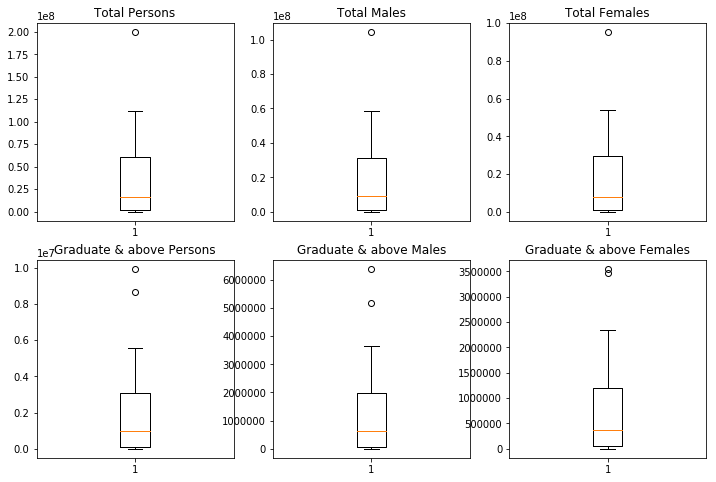

In [90]:
fig, axs = plt.subplots(2, 3, figsize=(12,8))

axs[0,0].boxplot(cleaned_data['Total Persons'])
axs[0,0].set_title("Total Persons")

axs[0,1].boxplot(cleaned_data['Total Males'])
axs[0,1].set_title("Total Males")

axs[0,2].boxplot(cleaned_data['Total Females'])
axs[0,2].set_title("Total Females")

axs[1,0].boxplot(cleaned_data['Graduate & above Persons'])
axs[1,0].set_title("Graduate & above Persons")

axs[1,1].boxplot(cleaned_data['Graduate & above Males'])
axs[1,1].set_title("Graduate & above Males")

axs[1,2].boxplot(cleaned_data['Graduate & above Females'])
axs[1,2].set_title("Graduate & above Females")
plt.show()

### Scaling the data:

In [96]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data.drop(axis=1, columns=['Area Name']))
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = cleaned_data.columns.drop('Area Name')
scaled_data.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Total Persons,Illiterate Persons,Graduate & above Persons,Total Males,Illiterate Males,Graduate & above Males,Total Females,Illiterate Females,Graduate & above Females,Percentage Illiterate,Percentage Graduate & above,Percentage Illiterate Males,Percentage Graduate & above Males,Percentage Illiterate Females,Percentage Graduate & above Females
0,-0.503383,-0.408494,-0.531105,-0.491517,-0.396622,-0.523710,-0.515932,-0.416906,-0.533243,1.326343,-0.349789,1.263305,-0.365621,1.364255,-0.338878
1,-0.632950,-0.612598,-0.615910,-0.630551,-0.613612,-0.621717,-0.635250,-0.611346,-0.594667,-0.658185,0.036431,-0.796636,-0.003122,-0.568771,0.080190
2,-0.156405,-0.209261,-0.077891,-0.139451,-0.155820,-0.215230,-0.174588,-0.248467,0.150111,0.038072,-0.011076,0.282017,-0.388573,-0.137024,0.357500
3,-0.765541,-0.700681,-0.719137,-0.758248,-0.694515,-0.717308,-0.773050,-0.704647,-0.708533,-0.994975,3.596036,-0.947386,3.348999,-0.954864,3.747482
4,-0.559417,-0.535387,-0.426090,-0.557667,-0.541825,-0.451379,-0.561051,-0.530201,-0.376308,-0.053981,0.788818,-0.261614,0.849393,0.069253,0.714759


In [106]:
cleaned_data.columns.drop('Area Name')

Index(['Total Persons', 'Illiterate Persons', 'Graduate & above Persons',
       'Total Males', 'Illiterate Males', 'Graduate & above Males',
       'Total Females', 'Illiterate Females', 'Graduate & above Females',
       'Percentage Illiterate', 'Percentage Graduate & above',
       'Percentage Illiterate Males', 'Percentage Graduate & above Males',
       'Percentage Illiterate Females', 'Percentage Graduate & above Females'],
      dtype='object')

In [91]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

## Hopkin statistics:

In [108]:
def hopkins(_data):
    _columns = _data.shape[1]
    rows_count = len(_data)
    m = int(0.1 * rows_count)
    random_data = sample(range(1, rows_count, 1), m)
    nbrs = NearestNeighbors(n_neighbors=1).fit(_data.values)
    data_hopkkins, random_hopkins = [], []
    
    for i in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(_data, axis=0),np.amax(_data, axis=0), _columns).reshape(1, -1), 2, return_distance=True)
        random_hopkins.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(_data.iloc[random_data[i]].values.reshape(1, -1), 2, return_distance=True)
        data_hopkkins.append(w_dist[0][1])
    
    H = sum(random_hopkins) / (sum(random_hopkins) + sum(data_hopkkins))
    return H

hopkins(scaled_data)

0.8505480985329288

### Silhouette Analysis

In [109]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [112]:
silhouette_data=[]
for i in range(2, 20):
    _cluster = KMeans(n_clusters=i, max_iter=50)
    _cluster.fit(scaled_data)
    silhouette_data.append(silhouette_score(scaled_data, _cluster.labels_))

silhouette_data

[0.4076831515543455,
 0.36665200472094645,
 0.36556695031609066,
 0.34757597686462577,
 0.3464753083302762,
 0.3328300692864833,
 0.33703904687403513,
 0.3345882229829964,
 0.32259412448912794,
 0.33064237997544454,
 0.30852499784913673,
 0.33408811320523935,
 0.3219255357369089,
 0.33448258340906156,
 0.3449702915793378,
 0.29407042373591763,
 0.281803004061675,
 0.2873311197181259]

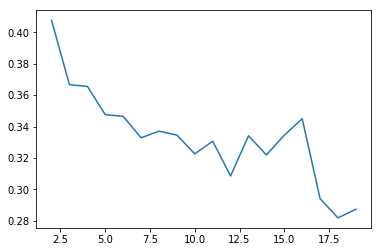

In [113]:
plt.plot(range(2,20), silhouette_data)

### Sum of squared distances

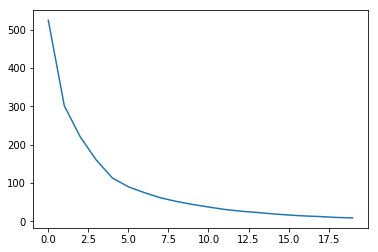

In [114]:
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(scaled_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [115]:
final_cluster = KMeans(n_clusters=5, max_iter=50)
final_cluster.fit(scaled_data)
final_cluster.labels_

array([4, 1, 4, 2, 1, 4, 2, 0, 3, 0, 1, 4, 4, 1, 1, 1, 4, 4, 0, 4, 4, 4,
       0, 0, 1, 4, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [133]:
pd.Series(final_cluster.labels_)

0     4
1     1
2     4
3     2
4     1
5     4
6     2
7     0
8     3
9     0
10    1
11    4
12    4
13    1
14    1
15    1
16    4
17    4
18    0
19    4
20    4
21    4
22    0
23    0
24    1
25    4
26    0
27    0
28    0
29    1
30    1
31    1
32    0
33    1
34    1
dtype: int32

In [136]:
cleaned_data.head()

,Area Name,Total Persons,Illiterate Persons,Graduate & above Persons,Total Males,Illiterate Males,Graduate & above Males,Total Females,Illiterate Females,Graduate & above Females,Percentage Illiterate,Percentage Graduate & above,Percentage Illiterate Males,Percentage Graduate & above Males,Percentage Illiterate Females,Percentage Graduate & above Females
0,State - JAMMU & KASHMIR,12541302,5474069,653764,6640662,2375991,401279,5900640,3098078,252485,43.648331,5.212888,35.779430,6.042756,52.504101,4.278943
1,State - HIMACHAL PRADESH,6864602,1824866,446609,3481873,729283,251164,3382729,1095583,195445,26.583712,6.505971,20.945135,7.213474,32.387549,5.777732
2,State - PUNJAB,27743338,9036201,1760846,14639465,4203409,873776,13103873,4832792,887070,32.570706,6.346915,28.712859,5.968633,36.880638,6.769525
3,State - CHANDIGARH,1055450,250012,194453,580663,115317,104748,474787,134695,89705,23.687716,18.423706,19.859540,18.039379,28.369564,18.893736
4,State - UTTARAKHAND,10086292,3205339,910288,5137773,1274065,512068,4948519,1931274,398220,31.779161,9.025001,24.798001,9.966731,39.027313,8.047256


In [143]:
all_columns = cleaned_data.columns.tolist()
all_columns.append('Category')
cleaned_data.reset_index(drop=True, inplace=True)
cluster_result = pd.concat([cleaned_data, pd.Series(final_cluster.labels_)], axis=1)
cluster_result.columns = all_columns
cluster_result.head()

,Area Name,Total Persons,Illiterate Persons,Graduate & above Persons,Total Males,Illiterate Males,Graduate & above Males,Total Females,Illiterate Females,Graduate & above Females,Percentage Illiterate,Percentage Graduate & above,Percentage Illiterate Males,Percentage Graduate & above Males,Percentage Illiterate Females,Percentage Graduate & above Females,Category
0,State - JAMMU & KASHMIR,12541302,5474069,653764,6640662,2375991,401279,5900640,3098078,252485,43.648331,5.212888,35.779430,6.042756,52.504101,4.278943,4
1,State - HIMACHAL PRADESH,6864602,1824866,446609,3481873,729283,251164,3382729,1095583,195445,26.583712,6.505971,20.945135,7.213474,32.387549,5.777732,1
2,State - PUNJAB,27743338,9036201,1760846,14639465,4203409,873776,13103873,4832792,887070,32.570706,6.346915,28.712859,5.968633,36.880638,6.769525,4
3,State - CHANDIGARH,1055450,250012,194453,580663,115317,104748,474787,134695,89705,23.687716,18.423706,19.859540,18.039379,28.369564,18.893736,2
4,State - UTTARAKHAND,10086292,3205339,910288,5137773,1274065,512068,4948519,1931274,398220,31.779161,9.025001,24.798001,9.966731,39.027313,8.047256,1


In [157]:
pd.options.display.float_format = '{:.2f}'.format

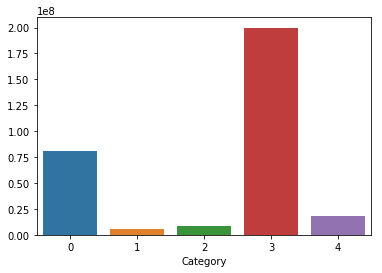

In [162]:
df = cluster_result.groupby('Category')['Total Persons'].mean()
sns.barplot(x=df.index, y=df.values)

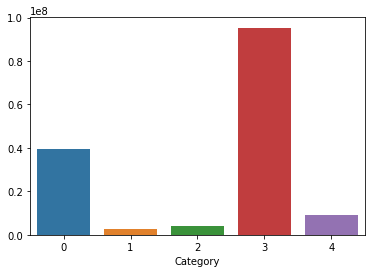

In [163]:
df = cluster_result.groupby('Category')['Total Females'].mean()
sns.barplot(x=df.index, y=df.values)

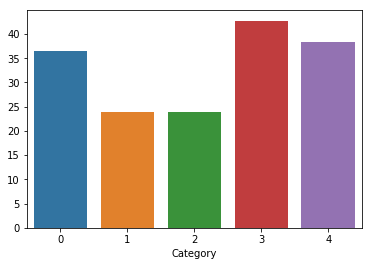

In [164]:
df = cluster_result.groupby('Category')['Percentage Illiterate'].mean()
sns.barplot(x=df.index, y=df.values)

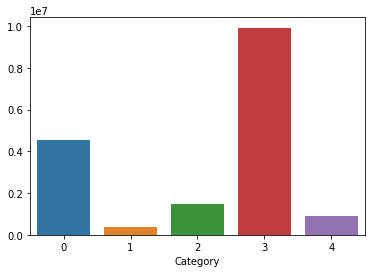

In [165]:
df = cluster_result.groupby('Category')['Graduate & above Persons'].mean()
sns.barplot(x=df.index, y=df.values)